Giorgia Castelli -> giorgia.castelli2@studio.unibo.it

Alice Fratini -> alice.fratini2@studio.unibo.it

Madalina Ionela Mone -> madalina.mone@studio.unibo.it

# **Product Recognition of Food Products**

## Image Processing and Computer Vision - Assignment Module \#1


Contacts:

- Prof. Giuseppe Lisanti -> giuseppe.lisanti@unibo.it
- Prof. Samuele Salti -> samuele.salti@unibo.it
- Alex Costanzino -> alex.costanzino@unibo.it
- Francesco Ballerini -> francesco.ballerini4@unibo.it


Computer vision-based object detection techniques can be applied in super market settings to build a system that can identify products on store shelves.
An example of how this system could be used would be to assist visually impaired customers or automate common store management tasks like detecting low-stock or misplaced products, given an image of a shelf in a store.

## Task
Develop a computer vision system that, given a reference image for each product, is able to identify such product from one picture of a store shelf.

<figure>
<a href="https://imgbb.com/">
  <center>
  <img src="https://i.ibb.co/TwkMWnH/Screenshot-2024-04-04-at-14-54-51.png" alt="Screenshot-2024-04-04-at-14-54-51" border="0" width="300" />
</a>
</figure>

For each type of product displayed in the
shelf the system should report:
1. Number of instances;
1. Dimension of each instance (width and height in pixel of the bounding box that enclose them);
1. Position in the image reference system of each instance (center of the bounding box that enclose them).

#### Example of expected output
```
Product 0 - 2 instance found:
  Instance 1 {position: (256, 328), width: 57px, height: 80px}
  Instance 2 {position: (311, 328), width: 57px, height: 80px}
Product 1 – 1 instance found:
.
.
.
```

### Track A - Single Instance Detection
Develop an object detection system to identify single instance of products given one reference image for each item and a scene image.

The system should be able to correctly identify all the product in the shelves
image.

### Track B - Multiple Instances Detection
In addition to what achieved at step A, the system should also be able to detect multiple instances of the same product.

## Data
Two folders of images are provided:
* **Models**: contains one reference image for each product that the system should be able to identify.
* **Scenes**: contains different shelve pictures to test the developed algorithm in different scenarios. The images contained in this folder are corrupted by noise.

#### Track A - Single Instance Detection
* **Models**: {ref1.png to ref14.png}.
* **Scenes**: {scene1.png to scene5.png}.

#### Track B - Multiple Instances Detection
* **Models**: {ref15.png to ref27.png}.
* **Scenes**: {scene6.png to scene12.png}.

In [169]:
'''#from google.colab import drive
#drive.mount('/content/drive')

!cp -r /content/drive/MyDrive/AssignmentsIPCV/dataset.zip ./
!unzip dataset.zip'''

"#from google.colab import drive\n#drive.mount('/content/drive')\n\n!cp -r /content/drive/MyDrive/AssignmentsIPCV/dataset.zip ./\n!unzip dataset.zip"

## Evaluation criteria
1. **Procedural correctness**. There are several ways to solve the assignment. Design your own sound approach and justify every decision you make;

2. **Clarity and conciseness**. Present your work in a readable way: format your code and comment every important step;

3. **Correctness of results**. Try to solve as many instances as possible. You should be able to solve all the instances of the assignment, however, a thoroughly justified and sound procedure with a lower number of solved instances will be valued **more** than a poorly designed approach.

In [131]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Track A

## Step 1: Preprocessing Images
The preprocessing for Track A focuses on denoising and enhancing images for optimal feature extraction. In this case, the sharpening filter and median filter are applied only once, reducing the risk of over-smoothing while preserving critical edges.

### Preprocessing Functions
- **`process_images`**: Applies a series of filters to clean the images:
  - Converts images from BGR to RGB.
  - Applies a **median filter** to reduce salt-and-pepper noise.
  - Applies **Gaussian blur** to smooth the image and reduce high-frequency noise.
  - Applies **Non-Local Means Denoising** for refined noise reduction.

- **`sharpen_image`**: Enhances edges in the image using a sharpening kernel. Critical for boosting performance of feature detectors like SIFT.

### Visualization
- **`visualize_preprocessing`**: Visualizes original and processed images side-by-side for comparison to verify preprocessing effectiveness.


## Step 2: Define Utility Functions
- **`get_hist`**: Computes the color histogram of an image, capturing the distribution of color intensities across channels.
the followed methods where used in the analysis phase.
- **`plot_histogram`**: Plots the histogram for the image's color channels, providing insights into its color distribution.
- **`visualize_histograms`**: Compares histograms of the query image and regions of interest (ROIs) in the scene images. Useful for validating feature matches based on color similarity.


## Step 3: Feature Detection and Matching
Detecting and matching features between query and scene images ensures accurate localization of query objects in the scenes.

### Methods
1. **Feature Detection**:
   - Uses **SIFT** (Scale-Invariant Feature Transform) to detect keypoints and compute descriptors.

2. **Descriptor Matching**:
   - Matches descriptors between query and scene images using a **FLANN-based matcher** with KNN (k-nearest neighbors).

3. **Lowe's Ratio Test**:
   - Applies Lowe's ratio test to filter out false matches. A match is considered good if the distance of the closest match is significantly less than the second-closest match.

### Functions
- **`track_A`**: Main function for Track A:
  - Detects keypoints and descriptors.
  - Matches features using FLANN.
  - Validates matches using Lowe's ratio test.
  - Returns results (bounding boxes and counts) for visualization.

- **`lowe_ratio`**: Implements Lowe's ratio test and calls `draw_boxes` if enough good matches are found to locate the query image in the scene.

## Step 4: Homography Estimation and Object Localization
Good matches from the feature matching step are used to estimate the location of the query image in the scene.

### Process
1. **Homography Estimation**:
   - Computes a **homography matrix (H)** using RANSAC.

2. **Object Localization**:
   - Maps the corners of the query image onto the scene image to identify the bounding box.
   - Validates the bounding box to ensure it is within scene boundaries.

### Functions
- **`draw_boxes`**:
  - Draws the bounding box and center point of the detected query image on the scene.
  - Uses a **color histogram similarity check** to verify matches when the number of good matches is below a certain threshold.

## Step 5: Execution and Visualization
- **Execution**:
  - Iterates through all combinations of scene and query images.
  - Calls `track_A` for each combination and visualizes the results.

- **Visualization**:
  - Displays detected query images in the scenes with bounding boxes.
  - Outputs the number of good matches, bounding box coordinates, and other relevant information for each detection.

## Summary
The first part of the project (Track A) uses SIFT and FLANN-based matching to detect instances of query images in scene images. Lowe's ratio test ensures robustness, while preprocessing steps minimize noise and enhance feature visibility. The system validates matches using a combination of homography estimation and color histogram similarity checks, improving detection accuracy in challenging scenarios.


In [ ]:
# Read the images from the dataset
scene_images = [cv2.imread(f'dataset/scenes/scene{i}.png') for i in range(1, 6)]
query_images = [cv2.imread(f'dataset/models/ref{i}.png') for i in range(1, 15)]

# Experiment with different kernel sizes
median_kernel_size = 5  # Kernel for median filter
gaussian_kernel_size = (5, 5)  # Kernel for Gaussian blur

# Preprocessing pipeline
def process_images(images, median_kernel_size, gaussian_kernel_size):
    """
    Preprocesses the images using a combination of filtering techniques.
    """
    # Convert from BGR to RGB
    images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

    # Apply median filter to remove salt-and-pepper noise
    median_filtered = [cv2.medianBlur(img, median_kernel_size) for img in images]

    # Apply Gaussian blur to reduce general blurring
    gaussian_blurred = [cv2.GaussianBlur(img, gaussian_kernel_size, 1) for img in median_filtered]

    # Apply Non-Local Means Denoising
    nlm_filtered = [cv2.fastNlMeansDenoisingColored(img, None, 12, 12, 7, 21) for img in gaussian_blurred]

    return nlm_filtered

# Sharpening filter
def sharpen_image(image):
    """
    Applies a sharpening filter to enhance edges in the image.
    """
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

'def visualize_preprocessing(original, processed, title):\n    """\n    Visualizes original and processed images for comparison.\n    """\n    plt.figure(figsize=(12, 6))\n    for i in range(len(original)):\n        plt.subplot(2, len(original), i + 1)\n        plt.imshow(cv2.cvtColor(original[i], cv2.COLOR_BGR2RGB))\n        plt.title(f"Original {title} {i+1}")\n        plt.axis("off")\n\n        plt.subplot(2, len(original), i + 1 + len(original))\n        plt.imshow(processed[i])\n        plt.title(f"Processed {title} {i+1}")\n        plt.axis("off")\n    plt.show()\n\n# Visualize scenes\nvisualize_preprocessing(scene_images, scenes, "Scene")\n\n# Visualize queries\nvisualize_preprocessing(query_images, queries, "Query")\n'

In [153]:
# Visualize preprocessing results
def visualize_preprocessing(original, processed, title):
    """
    Visualizes original and processed images for comparison.
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f"Original {title} ")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed)
    plt.title(f"Processed {title}")
    plt.axis("off")

    plt.show()


In [ ]:
# Apply preprocessing to scenes and query images
nlm_scenes = process_images(scene_images, median_kernel_size, gaussian_kernel_size)
scenes = [sharpen_image(img) for img in nlm_scenes]

nlm_queries = process_images(query_images, median_kernel_size, gaussian_kernel_size)
queries = [sharpen_image(img) for img in nlm_queries]

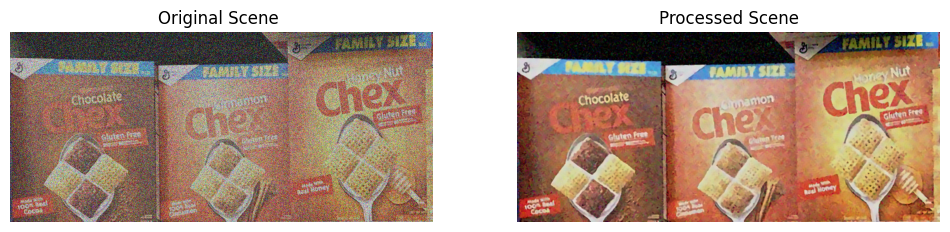

In [154]:
# Visualize scenes
visualize_preprocessing(scene_images[2], scenes[2], "Scene")

In [133]:
# color hist

def get_hist(img, bins=(8,8,8)):
    """
    Computes the color histogram of an image.
    """
    hist = cv2.calcHist([img], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

In [134]:
def plot_histogram(hist, title, color_space='HSV'):
    # Plotting the histogram for the three channels
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("Frequency")

    colors = ('b', 'g', 'r')
    for i, color in enumerate(colors):
        plt.plot(hist[i], color=color)
    plt.show()

def visualize_histograms(img_query, roi_train):
    # Compute histograms
    hist_query = get_hist(img_query)
    hist_roi_train = get_hist(roi_train)

    # Visualize histograms
    plot_histogram(hist_query, "Histogram for Query Image")
    plot_histogram(hist_roi_train, "Histogram for ROI in Train Image")

In [139]:
def draw_boxes(good, query_kp, scene_kp , query, scene, scene_i, query_i):
    '''
    draw the bounding box around the object in the scene image

    args:
    good: list of good matches
    query_kp: keypoints of the query image
    scene_kp: keypoints of the scene image
    query: query image
    scene: scene image
    scene_i: index of the scene image
    query_i: index of the query image

    return:
    scene_copy: scene image with the bounding box drawn around the object
    '''
    #correspondence arrays for good matches
    query_pts = np.float32([query_kp[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    scene_pts = np.float32([scene_kp[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    #estimate homography
    H, mask = cv2.findHomography(query_pts, scene_pts, cv2.RANSAC, 5.0)

    #get the corners of the query image
    h, w = query.shape[:2]
    query_corners = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)

    #prject the corners of the query image to the scene image
    scene_corners = cv2.perspectiveTransform(query_corners, H)

    #extraxt bounding box
    coordinates = np.int32(scene_corners).reshape(-1,2)
    x,y,w,h = cv2.boundingRect(coordinates)

    #get the center of the bounding box
    center = (x+w//2, y+h//2)
    
    #print("--------Number of good matches: ", len(good)) 
    #check the number of good matches
    if len(good) < 100:
        #ROI CHECKING 
        scene_roi = scene[y:y+h, x:x+w]
        if scene_roi.size == 0:
            return []
        
        hist_treshold = 0.4
        #visualize_histograms(query, scene_roi, query_i, scene_i)

        query_hist = get_hist(query)
        scene_roi_hist = get_hist(scene_roi)

        similarity = cv2.compareHist(query_hist, scene_roi_hist, cv2.HISTCMP_CORREL)
        #print("--------Similarity: ", similarity)

        if similarity < hist_treshold:
            return []
    
    print("Instance {} found in scene {} in position: ({}, {}), width: {}px, height: {}px".format(query_i, scene_i, center[0], center[1], w, h))
    print("Number of good matches: ", len(good))
    #draw the bounding box
    scene_copy = scene.copy()
    scene_copy = cv2.polylines(scene_copy,[np.int32(scene_corners)],True,(0, 255, 255),10, cv2.LINE_AA)
    scene_copy = cv2.circle(scene_copy, center, 10, (0, 255, 255), -1)
    return scene_copy


In [140]:
# lowe ratio function

def lowe_ratio(matches, min, query_kp, scene_kp , query, scene, scene_i, query_i, ratio=0.75):

    ''' 
    Function to apply the Lowe's ratio test to the matches and draw the bounding box around the object in the scene image

    args:
        matches: list of matches
        min: minimum number of good matches required
        query_kp: keypoints of the query image
        scene_kp: keypoints of the scene image
        query: query image
        scene: scene image
        scene_i: index of the scene image
        query_i: index of the query image
        ratio: ratio threshold for the Lowe's ratio test

    return:
    n   umber of matches if the number of good matches is greater than the minimum required, -1 otherwise
    '''

    good_matches = []
    for m, n in matches:
        if m.distance < 0.68*n.distance:
            good_matches.append(m)
    #print("Query: ", query_i)
    #print("Number of good matches: ", len(good_matches))

    # check if the number of good matches is greater than the minimum required
    if len(good_matches) >= 50:
        scene_img = draw_boxes(good_matches, query_kp, scene_kp , query, scene, scene_i, query_i)
        if(len(scene_img) == 0):
            return -1
        
        fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]})
        axes[0].imshow(query)
        axes[0].axis('off')
        axes[0].set_title('Query')

        axes[1].imshow(scene_img)
        axes[1].axis('off')
        axes[1].set_title('Scene')
        plt.show()
        return len(matches)
    else:
        return -1


In [137]:
# main function of track A (SIFT)

def track_A(scene, query, min, scene_i, query_i):

    # Initialize SIFT detector
    sift = cv2.SIFT_create()

    # Find keypoints and descriptors for scene and query images
    scene_kp, scene_des = sift.detectAndCompute(scene,  None)
    query_kp, query_des = sift.detectAndCompute(query, None)

    # Initialize FLANN matcher
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 55)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Match descriptors using KNN
    matches = flann.knnMatch(query_des, scene_des, k=2)

    found = lowe_ratio(matches, min, query_kp, scene_kp , query, scene, scene_i, query_i)
    return found


Instance 1 found in scene 1 in position: (412, 539), width: 805px, height: 1051px
Number of good matches:  584


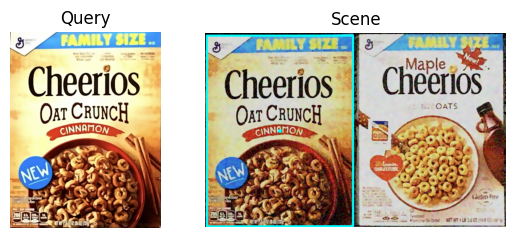

Instance 2 found in scene 1 in position: (1248, 534), width: 804px, height: 1050px
Number of good matches:  477


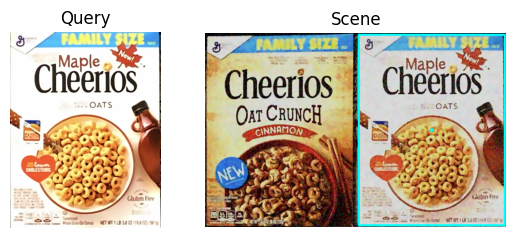

Instance 3 found in scene 2 in position: (306, 493), width: 607px, height: 943px
Number of good matches:  278


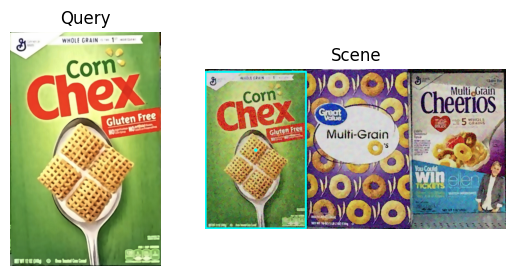

Instance 4 found in scene 2 in position: (928, 483), width: 636px, height: 952px
Number of good matches:  225


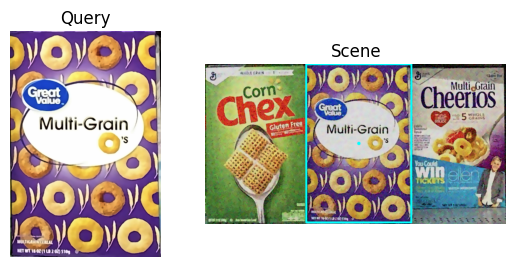

Instance 5 found in scene 2 in position: (1528, 450), width: 562px, height: 846px
Number of good matches:  313


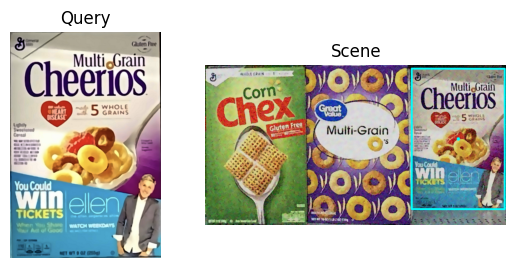

Instance 6 found in scene 3 in position: (299, 459), width: 603px, height: 672px
Number of good matches:  102


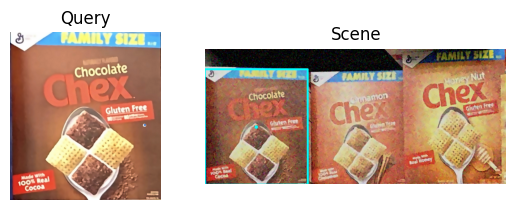

Instance 7 found in scene 3 in position: (889, 461), width: 545px, height: 652px
Number of good matches:  97


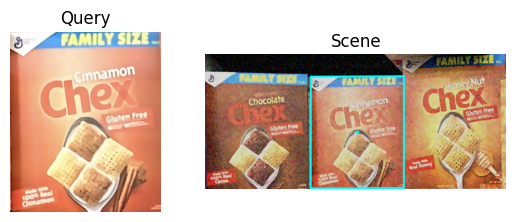

Instance 8 found in scene 3 in position: (1447, 398), width: 561px, height: 781px
Number of good matches:  163


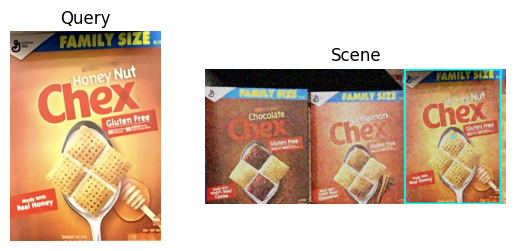

Instance 1 found in scene 4 in position: (887, 913), width: 383px, height: 516px
Number of good matches:  212


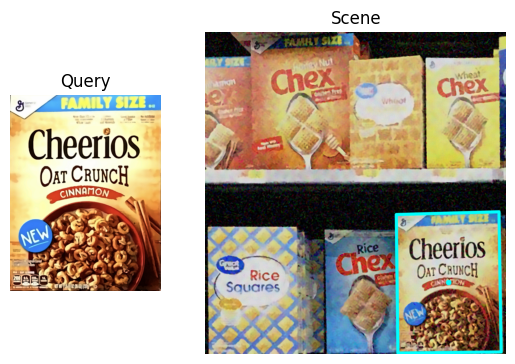

Instance 8 found in scene 4 in position: (350, 257), width: 350px, height: 491px
Number of good matches:  67


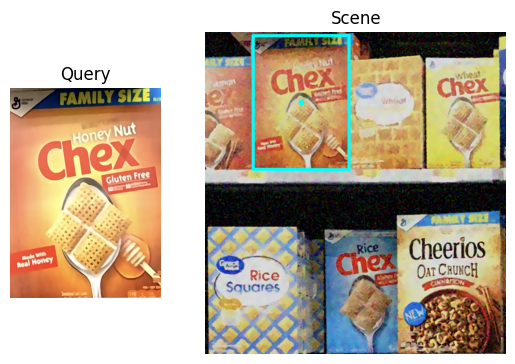

Instance 9 found in scene 4 in position: (174, 944), width: 330px, height: 468px
Number of good matches:  62


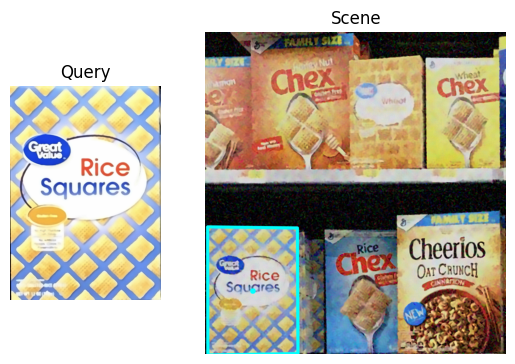

Instance 10 found in scene 4 in position: (938, 297), width: 272px, height: 410px
Number of good matches:  52


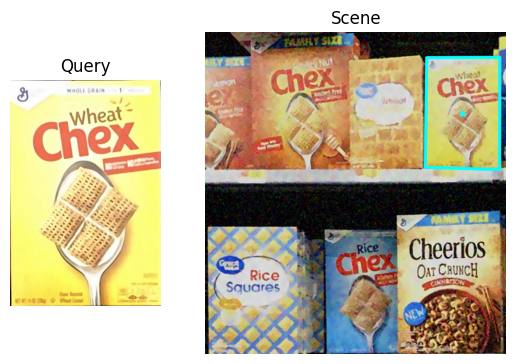

Instance 11 found in scene 5 in position: (368, 751), width: 369px, height: 559px
Number of good matches:  156


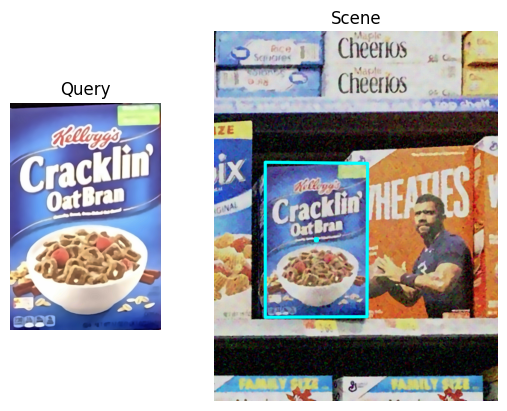

Instance 12 found in scene 5 in position: (717, 736), width: 440px, height: 658px
Number of good matches:  77


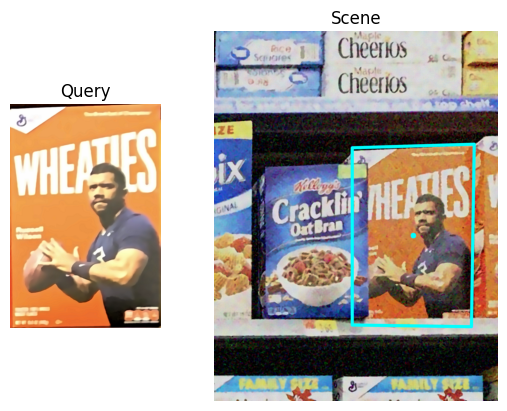

In [141]:
for i, scene_imgs in enumerate(scenes):
    for j, query_imgs in enumerate(queries):
        found = track_A(scene_imgs,query_imgs, 50, i+1, j+1) 

## Conclusion

This algorithm demonstrates excellent performance, accurately detecting the correct queries in their respective positions within the scene. The robust results are achieved through a combination of thoughtful design and iterative optimization.

Initially, detection relied on homography estimation to map the query image onto the scene. To enhance reliability, especially in cases where the number of good matches was insufficient, a color similarity check was introduced. This additional step significantly improved detection accuracy, ensuring robust performance even in challenging scenarios.

The preprocessing pipeline was designed with efficiency in mind, effectively handling noise and variations in the scenes. Notably, the algorithm performs well even when target images are partially obscured or affected by lighting inconsistencies. This is a testament to the algorithm's resilience and its ability to maintain high accuracy under less-than-ideal conditions.

# Track B

## Step 1: Denoising Images
The denoising process in Track B differs from Track A, as we apply a median filter twice to enhance the accuracy of the detector. Additionally, we experimented with an alternative kernel for the sharpening filter, which yielded better results in this case.

Despite our preprocessing efforts, some scene images remain heavily noisy. This residual noise could lead to misclassifications or errors. To mitigate these issues, we fine-tuned parameters and techniques during the detection process, such as the number of good matches or the distance threshold.

-  `process_b`: Preprocesses images using a combination of filtering techniques.
    - Converts images from BGR to RGB.
    - Applies median filtering twice to remove salt-and-pepper noise.
    - Applies Gaussian blur to reduce general blurring.
    - Applies Non-Local Means Denoising to further clean the images.
- `sharpen_b`: Applies a sharpening filter to enhance edges in the image.

## Step 2: Define Utility Functions
- `distance`: Computes Euclidean distance between two points.
- `compute_scale`: Scales the query image to different sizes for multi-scale detection.

## Step 3: Define Non-Maximum Suppression (NMS)
Non-Maximum Suppression is used to eliminate redundant bounding boxes that overlap significantly or are too close to each other. This ensures only one box is retained for each detected object or region of interest.

Algorithm:
- Calculate area for each box.
- Sort the boxes based on their bottom-right 𝑦max value (or other criteria).

For each box:
- Compute the IoU with every other box.
- If the IoU exceeds overlapThresh or the distance between the centers is less than min_distance, suppress the box with the smaller area.
- Repeat until no overlapping boxes remain.

## Step 4: Define the Main Detection Function (`track_B`)
Detect multiple instances of query images in scene images by:
- Matching features between query and scene.
- Calculating bounding boxes for matched features.
- Refining and visualizing the results.

For each scene and query image, the function scales the query image across multiple sizes. This approach improves accuracy, enabling detection even when the scene image is unclear, or the query is rotated or partially obscured by other items.

Feature Matching is divided in two stages, similar to track A.
Detect features in the query and scene using SIFT and then match descriptors using FLANN.

Once matches are identified, the function estimates the location of the query image in the scene:
1. **Homography Estimation**:
   - A homography matrix \(M\) is computed using the matched keypoints. This matrix represents the transformation (scaling, rotation, and translation) required to align the query with its corresponding region in the scene.
   - Using \(M\), the corners of the query image are mapped onto the scene, creating a bounding box that encloses the detected region.

2. **Validation**:
   - The function ensures that the homography matrix \(M\) is valid and that the resulting bounding box lies within the boundaries of the scene image. Invalid transformations or boxes outside the scene are discarded to avoid false positives.

Non-Maximum Suppression is applied to remove overlapping or redundant bounding boxes, ensuring that each detected instance corresponds to a unique object.

## Step 5: Define Result Printing
- Display counts and bounding box details for each query in each scene.

## Step 6: Execute and Visualize
- Run the `track_B` function with sample data.
- Display results using `print_result` and plot images with bounding boxes.


In [164]:
def process_b(images, gb_kernel):
    """
    Preprocesses the images using a combination of filtering techniques.
    """
    # Convert from BGR to RGB
    images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

    # Apply median filter to remove salt-and-pepper noise
    median_filtered = [cv2.medianBlur(img, 7) for img in images]
    
    median_filtered = [cv2.medianBlur(img, 5) for img in images]

    # Apply Gaussian blur to reduce general blurring
    gaussian_blurred = [cv2.GaussianBlur(img, gb_kernel, 1) for img in median_filtered]

    # Apply Non-Local Means Denoising
    nlm_filtered = [cv2.fastNlMeansDenoisingColored(img, None, 12, 12, 7, 21) for img in gaussian_blurred]

    return nlm_filtered

# Sharpening filter
def sharpen_b(image):
    """
    Applies a sharpening filter to enhance edges in the image.
    """
    kernel = np.array([[-1, -1, -1],
                      [-1,  9, -1],
                      [-1, -1, -1]]) * 1.2
    return cv2.filter2D(image, -1, kernel)

In [165]:

# Read the images from the dataset
scene_images_b = [cv2.imread(f'dataset/scenes/scene{i}.png') for i in range(6, 13)]
query_images_b = [cv2.imread(f'dataset/models/ref{i}.png') for i in range(15, 28)]

# Experiment with different kernel sizes
#median_kernel_size = 7 # Kernel for median filter
gaussian_kernel_size = (5, 5)  # Kernel for Gaussian blur

# Apply preprocessing to scenes and query images
nlm_scenes_b = process_b(scene_images_b, gaussian_kernel_size)
scenes_b = [sharpen_b(img) for img in nlm_scenes_b]

nlm_queries_b = process_b(query_images_b, gaussian_kernel_size)
queries_b = [sharpen_b(img) for img in nlm_queries_b]

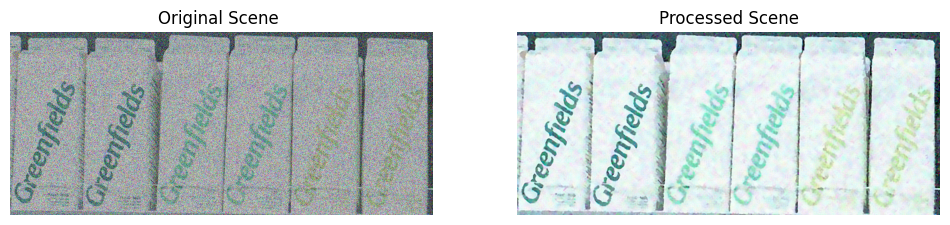

In [166]:
# Visualize preprocessing results
# Visualize scenes
visualize_preprocessing(scene_images_b[-1], scenes_b[-1], "Scene")

In [159]:
import numpy as np
import math
from collections import defaultdict

def distance(A, B):
    return math.sqrt(np.power(A[0] - B[0], 2) + np.power(A[1] - B[1], 2))

def compute_scale(template, train, scale):
    '''
    Scales the template image to match the size of the train image.
    '''
    scale_factor = (train.shape[0] / template.shape[0]) * scale
    return cv2.resize(template, None, fx=scale_factor, fy=scale_factor)

def NMS(boxes, overlapThresh, min_distance=10):
    '''
    Non-Maximum Suppression to suppress overlapping boxes.

    Args:
        boxes: List of bounding boxes to suppress.
        overlapThresh: Threshold for IoU to suppress boxes.
        min_distance: Minimum distance between boxes to suppress.

    Returns:
        List of final bounding boxes after applying NMS.    
    '''
    if len(boxes) == 0:
        return []

    # Convert to float for better precision
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)  # Sort by bottom-right y-coordinate

    good_boxes = []

    while len(idxs) > 0:
        # Take the last box in the list
        last = len(idxs) - 1
        i = idxs[last]
        good_boxes.append(i)
    
        # Compute IoU with other boxes
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        intersection = w * h
        iou = intersection / (area[i] + area[idxs[:last]] - intersection)

        # Compute the center distance
        centers_i = np.array([(x1[i] + x2[i]) / 2, (y1[i] + y2[i]) / 2])
        centers_others = np.array([(x1[idxs[:last]] + x2[idxs[:last]]) / 2, 
                                   (y1[idxs[:last]] + y2[idxs[:last]]) / 2]).T
        distances = np.linalg.norm(centers_i - centers_others, axis=1)

        # Suppress boxes based on IoU and minimum distance
        suppress = np.where((iou > overlapThresh) | (distances < min_distance))[0]

        # Delete suppressed boxes
        idxs = np.delete(idxs, np.concatenate(([last], suppress)))

    # Return final boxes as integers
    return boxes[good_boxes].astype("int")

# Main Function
def track_B(scene_imgs, query_imgs):
    '''
    Finds instances of query images in the scene images.

    Args:
        scene_imgs: List of scene images.
        query_imgs: List of query images.
    
    Returns:
        Dictionary containing the results for each scene image.
        List of scene images with bounding boxes drawn around the instances.
    '''
    results = {}
    final_scene = []
    colors = {
        'green': (0, 255, 0),
        'blue': (255, 0, 0),
        'red': (0, 0, 255),
        'yellow': (0, 255, 255),
        'purple': (255, 0, 255),
        'orange': (0, 165, 255),
        'cyan': (255, 255, 0),
        'pink': (147, 20, 255),
        'brown': (19, 69, 139),
        'white': (255, 255, 255),
        'black': (0, 0, 0),
        'gray': (128, 128, 128),
        'light_blue': (255, 127, 80)
    }
    for t, scene in enumerate(scene_imgs):
        #print(f"Processing scene {t}...")
        single_scene = defaultdict(lambda: {'c': 0, 'pos': [], 'w': [], 'h': []})
        scene_copy = scene.copy()

        for i, query in enumerate(query_imgs):
            #print(f"\tProcessing query image {i}...")
            best_boxes = []
            color_box = colors[list(colors.keys())[i % len(colors)]]
            scales = [round(0.60 + j * 0.02, 2) for j in range(20)]

            for scale in scales:
                #print(f"\t\tTrying scale {scale}...")
                query_scld = compute_scale(query, scene, scale)

                if query_scld.shape[0] > scene.shape[0] or query_scld.shape[1] > scene.shape[1]:
                    print("\t\t\tQuery scaled is too large for the scene.")
                    continue

                sift = cv2.SIFT_create()
                query_scld_kp, query_scld_des = sift.detectAndCompute(query_scld, None)
                scene_kp, scale_des = sift.detectAndCompute(scene, None)

                #match descriptors using FLANN
                FLANN_INDEX_KDTREE = 1
                index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
                search_params = dict(checks = 50)
                flann = cv2.FlannBasedMatcher(index_params, search_params)
                matches = flann.knnMatch(query_scld_des, scale_des, k=2)
                

                good_matches = []
                for m, n in matches:
                    if m.distance < 0.75 * n.distance:
                        good_matches.append(m)

                #print(f"\t\t\tFound {len(good_matches)} good matches.")
                if len(good_matches) < 20:
                    #print(f"\t\t\tNot enough good matches for query {i}. Skipping this query.")
                    break

                src_pts = np.float32([query_scld_kp[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
                dst_pts = np.float32([scene_kp[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

                M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

                h, w = query_scld.shape[:2]
                if M is not None:
                    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
                    dst = cv2.perspectiveTransform(pts, M)

                    x1, y1 = np.min(dst[:, 0, :], axis=0)
                    x2, y2 = np.max(dst[:, 0, :], axis=0)

                    '''hist_similarity = compare_histograms(template_scaled, img_train[int(y1):int(y2), int(x1):int(x2)])
                    print(f"\t\t\tHistogram similarity: {hist_similarity}")

                    if hist_similarity >= 0.30:'''
                    #print(f"\t\t\tAdding box: ({int(x1)}, {int(y1)}, {int(x2)}, {int(y2)})")
                    best_boxes.append((int(x1), int(y1), int(x2), int(y2)))

            # Apply non-max suppression to refine the boxes
            if best_boxes:
                best_boxes = np.array(best_boxes)
                final_boxes = NMS(best_boxes, overlapThresh=0.3)

                single_scene[i]['c'] = len(final_boxes)

                for box in final_boxes:
                    x1, y1, x2, y2 = box
                    w = distance((x1, y1), (x2, y1))
                    h = distance((x2, y1), (x2, y2))

                    single_scene[i]['w'].append(w)
                    single_scene[i]['h'].append(h)
                    single_scene[i]['pos'].append((x1 + w / 2, y1 + h / 2))

                    cv2.rectangle(scene_copy, (x1, y1), (x2, y2), color_box, 3)

        final_scene.append(scene_copy)
        results[str(t)] = single_scene

    return results, final_scene

In [157]:
def print_result(results, idx_of_scene):
    #print(f"Scene {int(idx_of_scene)+6}")
    for i, data in results[idx_of_scene].items():
        if data['c'] > 0:
            print(f"Product {i+15} - {data['c']} instance(s) found:")
            for j, pos in enumerate(data['pos']):
                print(f"\tInstance {j + 1} position: {pos}, w: {data['w'][j]}px, h: {data['h'][j]}px")
    #print("_" * 80)

In [167]:
resultsB, final_scene = track_B(scenes_b, queries_b)

Product 15 - 2 instance(s) found:
	Instance 1 position: (588.0, 645.0), w: 338.0px, h: 956.0px
	Instance 2 position: (186.0, 636.0), w: 348.0px, h: 938.0px
SCENE 6


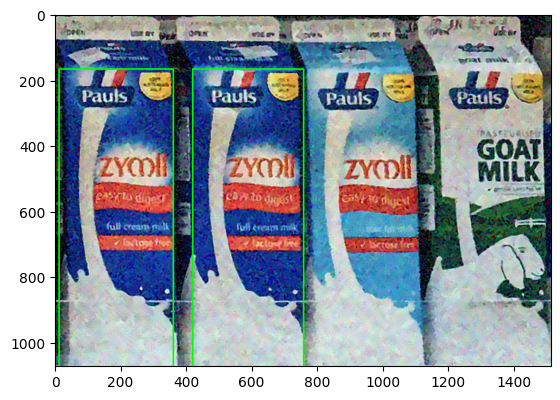

Product 16 - 2 instance(s) found:
	Instance 1 position: (1030.5, 464.0), w: 229.0px, h: 608.0px
	Instance 2 position: (794.5, 461.5), w: 215.0px, h: 601.0px
SCENE 7


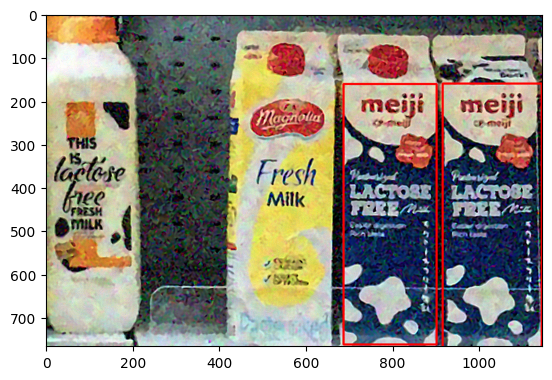

Product 17 - 1 instance(s) found:
	Instance 1 position: (647.5, 568.0), w: 325.0px, h: 856.0px
Product 23 - 2 instance(s) found:
	Instance 1 position: (987.0, 567.5), w: 322.0px, h: 869.0px
	Instance 2 position: (647.5, 560.0), w: 319.0px, h: 872.0px
Product 24 - 1 instance(s) found:
	Instance 1 position: (1338.0, 579.0), w: 328.0px, h: 854.0px
Product 26 - 1 instance(s) found:
	Instance 1 position: (261.5, 602.5), w: 383.0px, h: 809.0px
SCENE 8


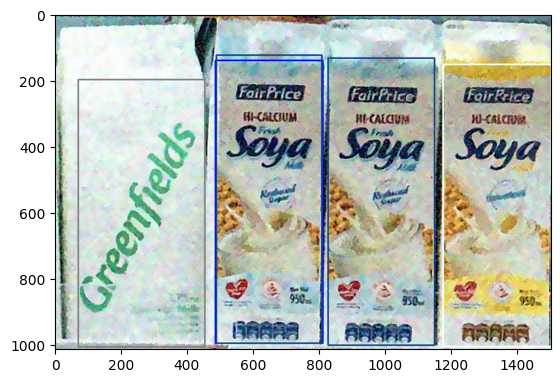

Product 19 - 2 instance(s) found:
	Instance 1 position: (853.0, 378.0), w: 218.0px, h: 576.0px
	Instance 2 position: (620.0, 376.0), w: 224.0px, h: 556.0px
Product 20 - 2 instance(s) found:
	Instance 1 position: (1104.5, 402.0), w: 257.0px, h: 600.0px
	Instance 2 position: (1360.0, 377.5), w: 226.0px, h: 559.0px
SCENE 9


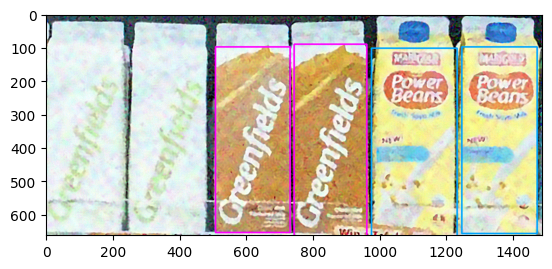

Product 21 - 4 instance(s) found:
	Instance 1 position: (1265.0, 551.0), w: 254.0px, h: 722.0px
	Instance 2 position: (983.5, 541.0), w: 249.0px, h: 718.0px
	Instance 3 position: (708.5, 541.5), w: 249.0px, h: 711.0px
	Instance 4 position: (1528.5, 538.0), w: 249.0px, h: 692.0px
Product 22 - 1 instance(s) found:
	Instance 1 position: (1257.0, 555.0), w: 246.0px, h: 746.0px
SCENE 10


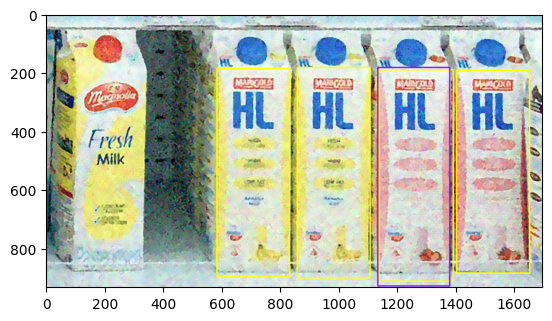

Product 17 - 1 instance(s) found:
	Instance 1 position: (168.0, 364.0), w: 184.0px, h: 502.0px
Product 23 - 2 instance(s) found:
	Instance 1 position: (165.5, 362.5), w: 183.0px, h: 507.0px
	Instance 2 position: (358.0, 365.0), w: 186.0px, h: 494.0px
Product 24 - 2 instance(s) found:
	Instance 1 position: (753.5, 388.0), w: 205.0px, h: 520.0px
	Instance 2 position: (555.0, 364.5), w: 186.0px, h: 487.0px
Product 25 - 2 instance(s) found:
	Instance 1 position: (1138.0, 386.5), w: 198.0px, h: 505.0px
	Instance 2 position: (1343.0, 373.5), w: 188.0px, h: 487.0px
SCENE 11


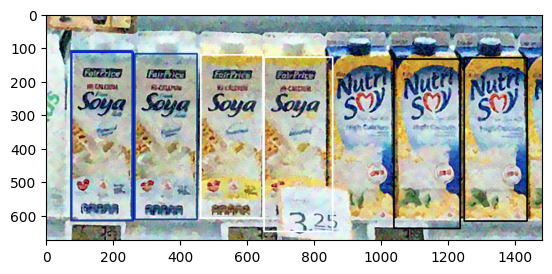

Product 26 - 2 instance(s) found:
	Instance 1 position: (409.0, 399.0), w: 234.0px, h: 598.0px
	Instance 2 position: (135.5, 373.0), w: 245.0px, h: 610.0px
SCENE 12


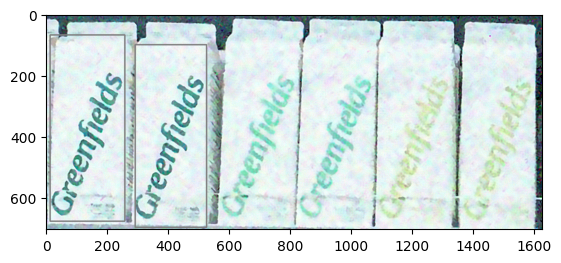

In [168]:
for j in range(len(scenes_b)):
  print_result(resultsB, str(j))
  print("SCENE", j+6)
  plt.imshow(final_scene[j])
  plt.show()

## Conclusion

During the development process, we explored multiple approaches to improve the detection system. Initially, we implemented a method similar to Track A, which incorporated Region of Interest (ROI) validation and color histogram checks. However, we observed that this approach significantly limited the detector's accuracy. The additional validation steps introduced constraints that reduced the number of matches, especially in cases where color variations or lighting conditions affected the ROI's histogram similarity.

To address these limitations, we transitioned to a scalar-based approach. This method focused on enhancing the accuracy of feature matching and allowed us to identify more matches, albeit with reduced reliance on color consistency. By prioritizing structural and spatial features over color information, we achieved better overall accuracy in detecting multiple instances of query images.

Furthermore, despite preprocessing efforts, we noted that the images remained affected by noise, which negatively influenced the results. The presence of noise disrupted the algorithm's ability to reliably identify good matches using SIFT and FLANN. This issue was particularly pronounced in areas dominated by white or brightly lit colors, where the algorithm struggled to differentiate features effectively. These challenges highlight the need for further refinement in preprocessing techniques and feature extraction methods to improve detection performance in challenging scenarios.